In [17]:
from tesserocr import get_languages, PyTessBaseAPI
import cv2
import matplotlib.pyplot as plt
import numpy as np

print(get_languages('C:/Programs/tessdata'))

('C:/Programs/tessdata/', ['eng'])


In [22]:
import requests
import base64
import bs4
import matplotlib.pyplot as plt

def get_captcha(filename):
    url = "https://service2.diplo.de/rktermin/extern/appointment_refreshCaptchamonth.do"
    data = {
        "action:appointment_refreshCaptchamonth": "Neues Bild laden",
        "locationCode": "amst",
        "realmId": 1113,
        "categoryId": 2662
    }
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36",
    }
    response = requests.post(url, data, headers=headers)
    soup = bs4.BeautifulSoup(response.text, "html.parser")
    # get captcha name tag
    captcha_div = soup.find("captcha").find("div")
    # get style of captcha_div
    style = captcha_div.attrs["style"]
    b64 = style.split(",")[1].split("')")[0]
    byt = base64.b64decode(b64)
    # show captcha image
    img = cv2.imdecode(np.frombuffer(byt, np.uint8), cv2.IMREAD_COLOR)
    # save image in captcha folder
    cv2.imwrite(filename, img)





In [23]:
for i in range(50):
    get_captcha(f"captcha/{i}.jpg")

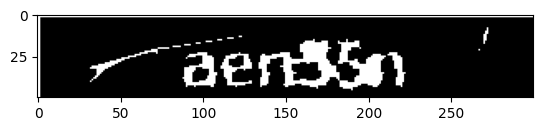

| aen%hn

[95, 5, 0]


In [13]:
img = cv2.imread("captcha/aen55n.jpg", cv2.IMREAD_GRAYSCALE)

thresh_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 25, 4)
ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU)

# apply opening

kernel_erode = np.ones((2, 2), np.uint8)
kernel_dilate = np.ones((2, 2), np.uint8)
img = cv2.dilate(img, kernel_dilate, iterations=1)
img = cv2.erode(img, kernel_erode, iterations=3)

plt.imshow(img, "gray")
plt.show()
cv2.imwrite("test.jpg", img)


with PyTessBaseAPI(path='C:/Programs/tessdata') as api:
    img = "test.jpg"
    api.SetImageFile(img)
    print(api.GetUTF8Text())
    print(api.AllWordConfidences())
